In [2]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import requests
import pytz
from MCForecastTools import MCSimulation

In [3]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [4]:
# Select the Tickers needed and get past 4 Year's Worth of Stock Price Data
mc_tickerxx = yf.download("T NKE XOM", start="2018-12-30", end="2022-12-30")
mc_tickerxx.rename(columns = {"Open":"open", "High":"high", "Low":"low","Adj Close":"adj close", "Close":"close", "Volume":"volume"}, inplace = True)
mc_tickerxx

[*********************100%***********************]  3 of 3 completed


adj close                              close             \
                   NKE          T         XOM         NKE          T   
Date                                                                   
2018-12-31   71.361412  15.402360   54.603760   74.139999  21.555891   
2019-01-02   71.284439  15.942039   55.804909   74.059998  22.311178   
2019-01-03   70.023506  15.963627   54.948093   72.750000  22.341391   
2019-01-04   71.852303  16.373777   56.974007   74.650002  22.915407   
2019-01-07   72.882202  16.670601   57.270279   75.720001  23.330816   
...                ...        ...         ...         ...        ...   
2022-12-22  116.709999  18.270000  105.879997  116.709999  18.270000   
2022-12-23  116.250000  18.309999  108.680000  116.250000  18.309999   
2022-12-27  117.559998  18.459999  110.190002  117.559998  18.459999   
2022-12-28  114.980003  18.219999  108.379997  114.980003  18.219999   
2022-12-29  117.349998  18.450001  109.199997  117.349998  18.450001   

                              high                                low  \
                   XOM         NKE          T         XOM         NKE   
Date                                                                    
2018-12-31   68.190002   74.459999  21.631420   69.150002   73.519997   
2019-01-02   69.690002   74.639999  22.348944   69.870003   72.190002   
2019-01-03   68.620003   73.320000  22.515106   70.250000   71.209999   
2019-01-04   71.150002   75.120003  22.945620   71.269997   73.120003   
2019-01-07   71.519997   76.360001  23.617825   72.099998   74.300003   
...                ...         ...        ...         ...         ...   
2022-12-22  105.879997  116.820000  18.280001  108.190002  114.059998   
2022-12-23  108.680000  117.169998  18.320000  108.739998  115.779999   
2022-12-27  110.190002  118.199997  18.520000  110.470001  115.820000   
2022-12-28  108.379997  118.239998  18.549999  110.000000  114.959999   
2022-12-29  109.199997  118.070000  18.549999  109.720001  115.800003   

                                         open                         \
                    T         XOM         NKE          T         XOM   
Date                                                                   
2018-12-31  21.216011   67.660004   73.980003  21.578550   68.320000   
2019-01-02  21.374622   67.260002   72.790001  21.525681   67.349998   
2019-01-03  22.061934   68.360001   73.250000  22.296074   70.000000   
2019-01-04  22.575529   69.360001   73.449997  22.628399   69.639999   
2019-01-07  22.975830   70.739998   74.739998  23.209970   71.250000   
...               ...         ...         ...        ...         ...   
2022-12-22  17.920000  104.099998  114.290001  18.010000  107.889999   
2022-12-23  18.100000  106.900002  116.110001  18.170000  106.949997   
2022-12-27  18.219999  108.830002  116.470001  18.250000  109.269997   
2022-12-28  18.190001  107.900002  117.580002  18.450001  109.910004   
2022-12-29  18.240000  107.989998  116.080002  18.270000  107.989998   

              volume                      
                 NKE         T       XOM  
Date                                      
2018-12-31   5519100  69988626  15807000  
2019-01-02   6762700  52025256  16727200  
2019-01-03   8007400  49787166  13866100  
2019-01-04   7844200  55703858  16043600  
2019-01-07   8184800  54377872  10844200  
...              ...       ...       ...  
2022-12-22  17147600  32615000  13213000  
2022-12-23   6603700  25164100  11539400  
2022-12-27   6661100  30382500  11962100  
2022-12-28   5437800  26632300  10702100  
2022-12-29   4588600  23765900  10534000  

[1008 rows x 18 columns]

In [5]:
# Simulate five year portfolio growth with evenly-distributed stock investments

# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = mc_tickerxx,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)
# Print the simulation input data
MC_even_dist.portfolio_data.head()

KeyError: 'close'

In [19]:
# Calculate the daily returns and volatility of the stock
daily_returns = mc_tickerxx.pct_change().dropna()
daily_volatility = daily_returns.std()
daily_returns

adj close                         close                      \
                 NKE         T       XOM       NKE         T       XOM   
Date                                                                     
2019-01-02 -0.001079  0.035038  0.021997 -0.001079  0.035039  0.021997   
2019-01-03 -0.017688  0.001354 -0.015354 -0.017688  0.001354 -0.015354   
2019-01-04  0.026117  0.025693  0.036870  0.026117  0.025693  0.036870   
2019-01-07  0.014334  0.018128  0.005200  0.014334  0.018128  0.005200   
2019-01-08  0.013338  0.012625  0.007271  0.013339  0.012625  0.007271   
...              ...       ...       ...       ...       ...       ...   
2022-12-22  0.008032  0.006612 -0.020174  0.008032  0.006612 -0.020174   
2022-12-23 -0.003941  0.002189  0.026445 -0.003941  0.002189  0.026445   
2022-12-27  0.011269  0.008192  0.013894  0.011269  0.008192  0.013894   
2022-12-28 -0.021946 -0.013001 -0.016426 -0.021946 -0.013001 -0.016426   
2022-12-29  0.020612  0.012624  0.007566  0.020612  0.012624  0.007566   

                high                           low                      \
                 NKE         T       XOM       NKE         T       XOM   
Date                                                                     
2019-01-02  0.002417  0.033170  0.010412 -0.018090  0.007476 -0.005912   
2019-01-03 -0.017685  0.007435  0.005439 -0.013575  0.032155  0.016354   
2019-01-04  0.024550  0.019121  0.014520  0.026822  0.023280  0.014628   
2019-01-07  0.016507  0.029296  0.011646  0.016138  0.017732  0.019896   
2019-01-08  0.013620  0.003518  0.006796  0.025572  0.020053  0.016964   
...              ...       ...       ...       ...       ...       ...   
2022-12-22 -0.019802  0.000547 -0.003684 -0.011098 -0.008301 -0.028555   
2022-12-23  0.002996  0.002188  0.005084  0.015080  0.010045  0.026897   
2022-12-27  0.008791  0.010917  0.015910  0.000345  0.006630  0.018054   
2022-12-28  0.000338  0.001620 -0.004255 -0.007425 -0.001646 -0.008545   
2022-12-29 -0.001438  0.000000 -0.002545  0.007307  0.002749  0.000834   

                open                        volume                      
                 NKE         T       XOM       NKE         T       XOM  
Date                                                                    
2019-01-02 -0.016085 -0.002450 -0.014198  0.225327 -0.256661  0.058215  
2019-01-03  0.006320  0.035790  0.039347  0.184054 -0.043019 -0.171045  
2019-01-04  0.002730  0.014905 -0.005143 -0.020381  0.118840  0.157038  
2019-01-07  0.017563  0.025701  0.023119  0.043421 -0.023804 -0.324079  
2019-01-08  0.027964  0.018874  0.018105  0.076263  0.060783  0.054850  
...              ...       ...       ...       ...       ...       ...  
2022-12-22 -0.021155 -0.009351 -0.003694 -0.476845 -0.229255 -0.025978  
2022-12-23  0.015924  0.008884 -0.008713 -0.614891 -0.228450 -0.126663  
2022-12-27  0.003101  0.004403  0.021692  0.008692  0.207375  0.036631  
2022-12-28  0.009530  0.010959  0.005857 -0.183648 -0.123433 -0.105333  
2022-12-29 -0.012757 -0.009756 -0.017469 -0.156166 -0.107629 -0.015707  

[1007 rows x 18 columns]

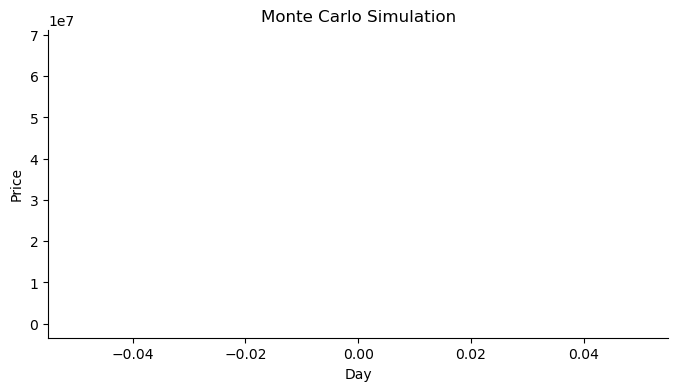

In [124]:
# Run Monte Carlo simulation
trading_days = 252
count = 0
price_list = []
last_price = mc_tickerxx.iloc[0]

price = last_price * (1 + np.random.normal(0, daily_volatility))
price_list.append(price)

for y in range(trading_days):
    if count == 251:
        break
        price = price_list[count] * (1 + np.random.normal(0,daily_volatility))
        price_list.append(price)
        count += 1

# Plot the results
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
ax.plot(price_list, color = '#006BA2', linewidth = 3)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("Monte Carlo Simulation")
plt.show()

In [99]:
# Get past 4 Year's Worth of Stock Price Data via API Call
mc_tickers = yf.Tickers("T NKE XOM")
sd = dt.datetime(2018, 12, 30)
ed = dt.datetime(2022, 12, 30)
mc_tickers_4yr = mc_tickers.history(start=sd, end=ed)
mc_tickers_4yr.
mc_tickers_4yr


[*********************100%***********************]  3 of 3 completed


close                        Dividends                  high  \
                   NKE          T         XOM       NKE    T  XOM         NKE   
Date                                                                            
2018-12-31   71.361412  15.402361   54.603760       0.0  0.0  0.0   71.669419   
2019-01-02   71.284401  15.942038   55.804897       0.0  0.0  0.0   71.842666   
2019-01-03   70.023499  15.963624   54.948082       0.0  0.0  0.0   70.572136   
2019-01-04   71.852318  16.373777   56.973999       0.0  0.0  0.0   72.304705   
2019-01-07   72.882210  16.670599   57.270287       0.0  0.0  0.0   73.498224   
...                ...        ...         ...       ...  ...  ...         ...   
2022-12-22  116.709999  18.270000  105.879997       0.0  0.0  0.0  116.820000   
2022-12-23  116.250000  18.309999  108.680000       0.0  0.0  0.0  117.169998   
2022-12-27  117.559998  18.459999  110.190002       0.0  0.0  0.0  118.199997   
2022-12-28  114.980003  18.219999  108.379997       0.0  0.0  0.0  118.239998   
2022-12-29  117.349998  18.450001  109.199997       0.0  0.0  0.0  118.070000   

                                          low  ...                    open  \
                    T         XOM         NKE  ...         XOM         NKE   
Date                                           ...                           
2018-12-31  15.456329   55.372488   70.764646  ...   54.179358   71.207412   
2019-01-02  15.969022   55.949034   69.484489  ...   53.859053   70.062001   
2019-01-03  16.087749   56.253317   68.541213  ...   54.739883   70.504760   
2019-01-04  16.395365   57.070086   70.379659  ...   55.540640   70.697286   
2019-01-07  16.875675   57.734728   71.515429  ...   56.645695   71.938934   
...               ...         ...         ...  ...         ...         ...   
2022-12-22  18.280001  108.190002  114.059998  ...  104.099998  114.290001   
2022-12-23  18.320000  108.739998  115.779999  ...  106.900002  116.110001   
2022-12-27  18.520000  110.470001  115.820000  ...  108.830002  116.470001   
2022-12-28  18.549999  110.000000  114.959999  ...  107.900002  117.580002   
2022-12-29  18.549999  109.720001  115.800003  ...  107.989998  116.080002   

                                  Stock Splits              volume            \
                    T         XOM          NKE    T  XOM       NKE         T   
Date                                                                           
2018-12-31  15.418552   54.707856          0.0  0.0  0.0   5519100  69988626   
2019-01-02  15.380775   53.931118          0.0  0.0  0.0   6762700  52025256   
2019-01-03  15.931244   56.053127          0.0  0.0  0.0   8007400  49787166   
2019-01-04  16.168701   55.764851          0.0  0.0  0.0   7844200  55703858   
2019-01-07  16.584251   57.054084          0.0  0.0  0.0   8184800  54377872   
...               ...         ...          ...  ...  ...       ...       ...   
2022-12-22  18.010000  107.889999          0.0  0.0  0.0  17147600  32615000   
2022-12-23  18.170000  106.949997          0.0  0.0  0.0   6603700  25164100   
2022-12-27  18.250000  109.269997          0.0  0.0  0.0   6661100  30382500   
2022-12-28  18.450001  109.910004          0.0  0.0  0.0   5437800  26632300   
2022-12-29  18.270000  107.989998          0.0  0.0  0.0   4588600  23765900   

                      
                 XOM  
Date                  
2018-12-31  15807000  
2019-01-02  16727200  
2019-01-03  13866100  
2019-01-04  16043600  
2019-01-07  10844200  
...              ...  
2022-12-22  13213000  
2022-12-23  11539400  
2022-12-27  11962100  
2022-12-28  10702100  
2022-12-29  10534000  

[1008 rows x 21 columns]